In [8]:
import pandas as pd
import numpy as np
import os 
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
import math
import re
from sklearn import preprocessing
os.chdir("../")
os.chdir("FinalDataset")

In [9]:
data = pd.read_csv("feature.csv", index_col=False,low_memory=False)
data.drop(columns='Unnamed: 0',inplace=True)
data.drop(columns='has_ip',inplace=True)
data.drop(columns='urlIsLive',inplace=True)

In [10]:
data.replace('Benign_list_big_final',"Benign",inplace=True)
data.replace('DefacementSitesURLFiltered',"Defacement",inplace=True)
data.replace('Malware_dataset',"Malware",inplace=True)
data.replace('phishing_dataset',"Phishing",inplace=True)
data.replace('spam_dataset',"Spam",inplace=True)

In [12]:
data.head()

,File,bodyLength,bscr,dse,dsr,entropy,hasHttp,hasHttps,numDigits,numImages,numLinks,numParams,numTitles,num_%20,num_@,sbr,scriptLength,specialChars,sscr,urlLength
0,Spam,31,0.064516,0,0,-4.708307,True,False,27,1,0,0,0,0,0,0.000000,0,2,0.000000,81
1,Spam,64790,0.306050,0,0,-4.576882,True,False,12,6,183,0,19,0,0,0.923800,59853,19829,3.018458,58
2,Spam,757,0.195509,0,0,-4.205536,True,False,0,6,8,0,1,0,0,0.000000,0,148,0.000000,46
3,Spam,266310,0.230915,0,0,-4.550931,True,False,13,3,831,0,648,0,0,0.312647,83261,61495,1.353947,52
4,Spam,40,0.200000,0,0,-4.689336,True,False,14,0,0,2,1,0,0,0.000000,0,8,0.000000,83


In [13]:
grouped_df = data.groupby("File")
mean_df = grouped_df.mean()

In [15]:
mean_df.head()

,bodyLength,bscr,dse,dsr,entropy,hasHttp,hasHttps,numDigits,numImages,numLinks,numParams,numTitles,num_%20,num_@,sbr,scriptLength,specialChars,sscr,urlLength
File,,,,,,,,,,,,,,,,,,,
Benign,50059.051273,0.215643,447.293091,3974.106818,-4.479222,0.946727,0.053818,14.677364,15.426000,100.891818,0.471364,11.824182,0.028727,0.005182,0.466055,32989.182273,11751.150727,3.977061,114.259636
Defacement,7128.453655,0.120285,0.000000,0.000000,-4.457697,1.000000,0.000000,4.574643,4.498250,17.878312,1.711029,2.789221,0.000000,0.000000,0.165609,2394.568443,1691.878612,0.658949,86.417958
Malware,2926.801211,0.080709,0.000000,0.000000,-4.269339,0.974751,0.007350,16.076697,0.555556,5.749503,0.723649,0.358582,0.038911,0.001124,0.142642,1078.286987,738.763511,0.570084,83.707652
Phishing,3729.060411,0.102345,202.291420,2259.149022,-4.474045,0.983241,0.032112,8.868741,1.468941,7.517511,0.222679,1.227797,0.024385,0.003011,0.163015,1650.983843,941.686402,0.614699,84.313999
Spam,12221.293250,0.099236,0.000000,0.000000,-4.748068,1.000000,0.000000,21.736667,1.123500,39.223250,1.223167,9.135583,0.174583,0.001750,0.176403,8966.440333,3458.677833,0.612630,126.761917


In [16]:
x = mean_df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
mean_d = pd.DataFrame(x_scaled)

In [18]:
ben = mean_d.iloc[0].to_numpy()
defa = mean_d.iloc[1].to_numpy()
mal = mean_d.iloc[2].to_numpy()
phis = mean_d.iloc[3].to_numpy()
spam = mean_d.iloc[4].to_numpy()

In [19]:
col = data.columns[1:]

In [20]:
col

Index(['bodyLength', 'bscr', 'dse', 'dsr', 'entropy', 'hasHttp', 'hasHttps',
       'numDigits', 'numImages', 'numLinks', 'numParams', 'numTitles',
       'num_%20', 'num_@', 'sbr', 'scriptLength', 'specialChars', 'sscr',
       'urlLength'],
      dtype='object')

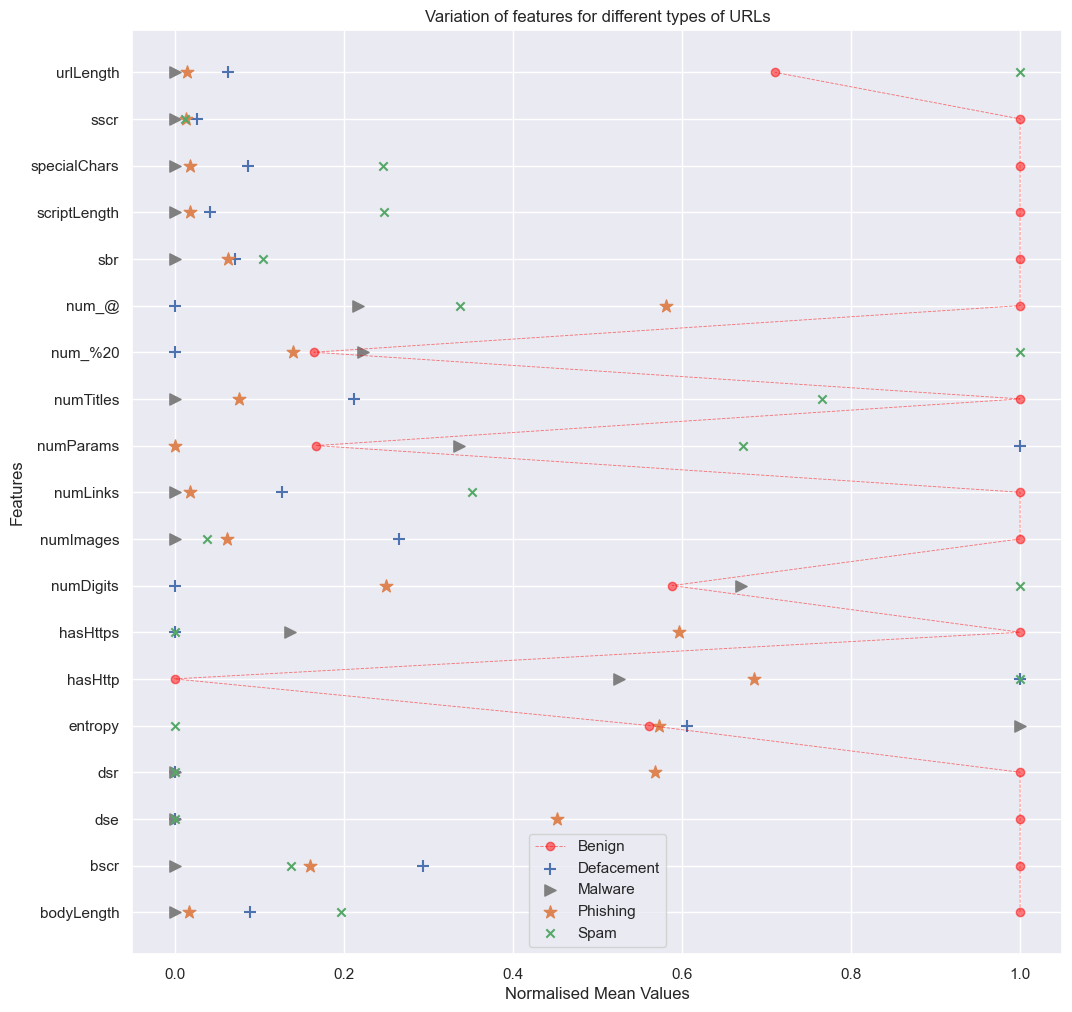

In [24]:
plt.figure(figsize=(12,12))
plt.plot(ben,col, color='red', marker='o',linewidth=0.65,linestyle="--",alpha=0.5)
plt.scatter(defa,col, marker='+',s=80)
plt.scatter(mal,col, color='grey',marker='>',s=65)
plt.scatter(phis,col, marker='*',s=90)
plt.scatter(spam,col, marker='x')
plt.legend(['Benign', 'Defacement', 'Malware', 'Phishing', 'Spam'])
plt.title("Variation of features for different types of URLs")
plt.ylabel("Features")
plt.xlabel("Normalised Mean Values")
plt.savefig('Feature_Plot.png')
plt.show()

In [22]:
objects = [i for i in data.columns if 'object' in str(data.dtypes[i])]
booleans = [i for i in data.columns if 'bool' in str(data.dtypes[i])]
ints = [i for i in data.columns if 'int' in str(data.dtypes[i]) or 'float' in str(data.dtypes[i])]

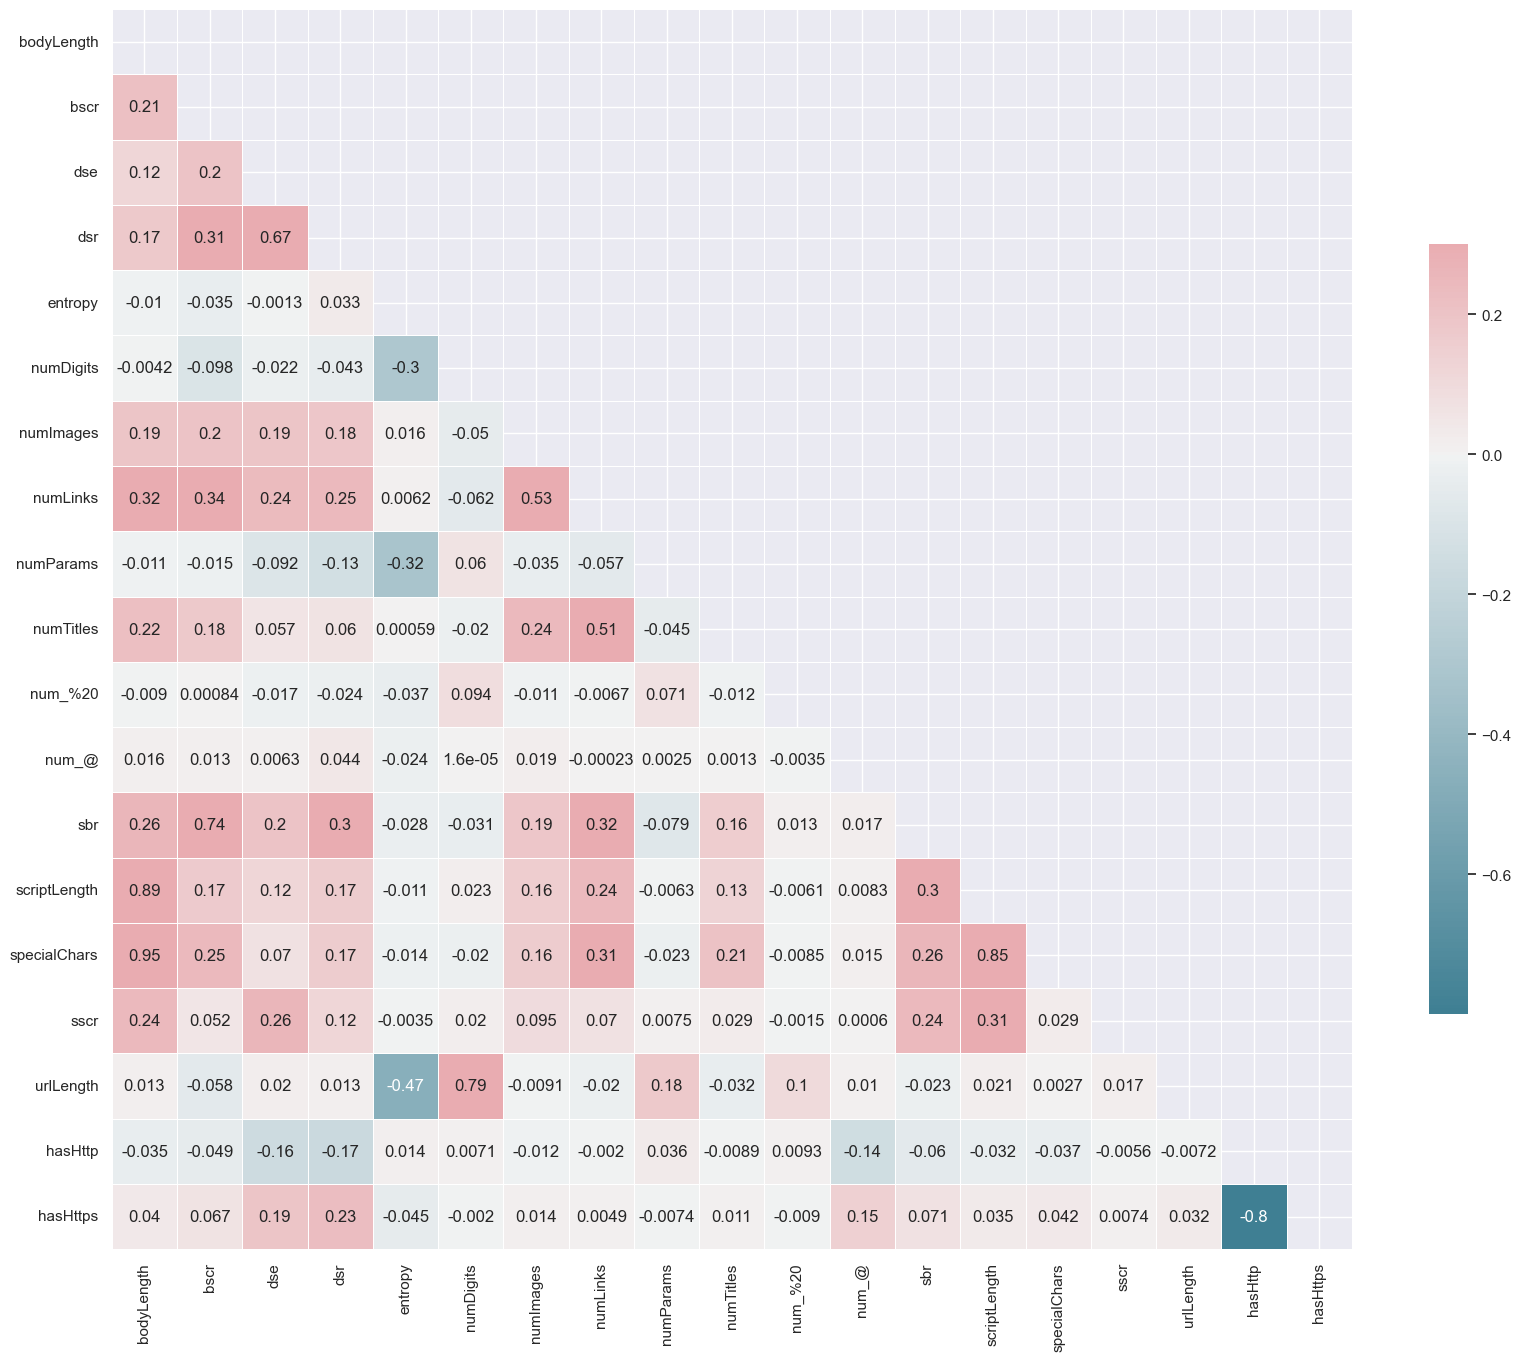

In [23]:
corr = data[ints+booleans].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.savefig('Feature_Corr.png')
plt.show()

In [7]:
import os
os.chdir("C:/Users/Kanav/Documents/urlclassifier/FinalDataset")

